In [40]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy as sp
from pprint import pprint
import quandl
from config import quandl_key
import numpy as np
from matplotlib.pyplot import figure
from scipy import stats
from scipy.stats import linregress

In [2]:
master_csv = pd.read_csv("pw_master_data_cleaned.csv")
master_csv

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-4,4/30/2016,4/28/2016,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.00,30566,3.5,3.88,3.66
1,2016,Apr,2016-4,4/30/2016,4/28/2016,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.00,30566,3.5,3.88,3.66
2,2016,Apr,2016-4,4/30/2016,4/28/2016,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.00,30566,3.5,3.88,3.66
3,2016,Apr,2016-4,4/30/2016,4/28/2016,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.00,30566,3.5,3.88,3.66
4,2016,Apr,2016-4,4/30/2016,4/28/2016,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.00,30566,3.5,3.88,3.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67019,2020,Sep,2020-9,9/26/2020,NaN,CRAW,"Share of Listings With a Price Cut (Raw, All H...",394645,metro,"Greeley, CO",0.05,332367,6.4,NaN,NaN
67020,2020,Sep,2020-9,9/19/2020,NaN,CRSW,"Share of Listings With a Price Cut (Raw, SFR O...",394645,metro,"Greeley, CO",0.04,332367,6.4,NaN,NaN
67021,2020,Sep,2020-9,9/26/2020,NaN,CRSW,"Share of Listings With a Price Cut (Raw, SFR O...",394645,metro,"Greeley, CO",0.05,332367,6.4,NaN,NaN
67022,2020,Sep,2020-9,9/30/2020,NaN,CRSM,"Share of Listings With a Price Cut (Raw, SFR O...",394645,metro,"Greeley, CO",0.13,332367,6.4,NaN,NaN


In [53]:
isam_df = master_csv.loc[master_csv['Indicator ID']=='ISAM']
isam_df = isam_df.drop_duplicates(subset=['Indicator ID', 'Value', 'Region Name'])

The correlation coefficient is 0.0
The line equation is as follows:  y = 7.92x + 5290.51


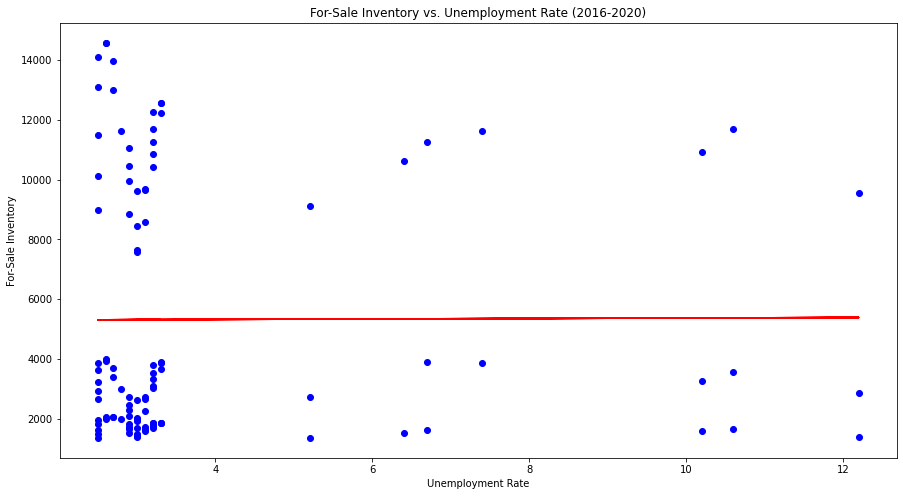

In [54]:
#combined graph for presentation -- Unemployment Rate
x_values = isam_df['Unemployment Rate']
y_values = isam_df['Value']

plt.xlabel('Unemployment Rate')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory vs. Unemployment Rate (2016-2020)")

#plt.xticks(rotation = 'vertical')
#plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("master_csv_isam_unemployment.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

The correlation coefficient is 0.6
The line equation is as follows:  y = 0.01x + -2681.51


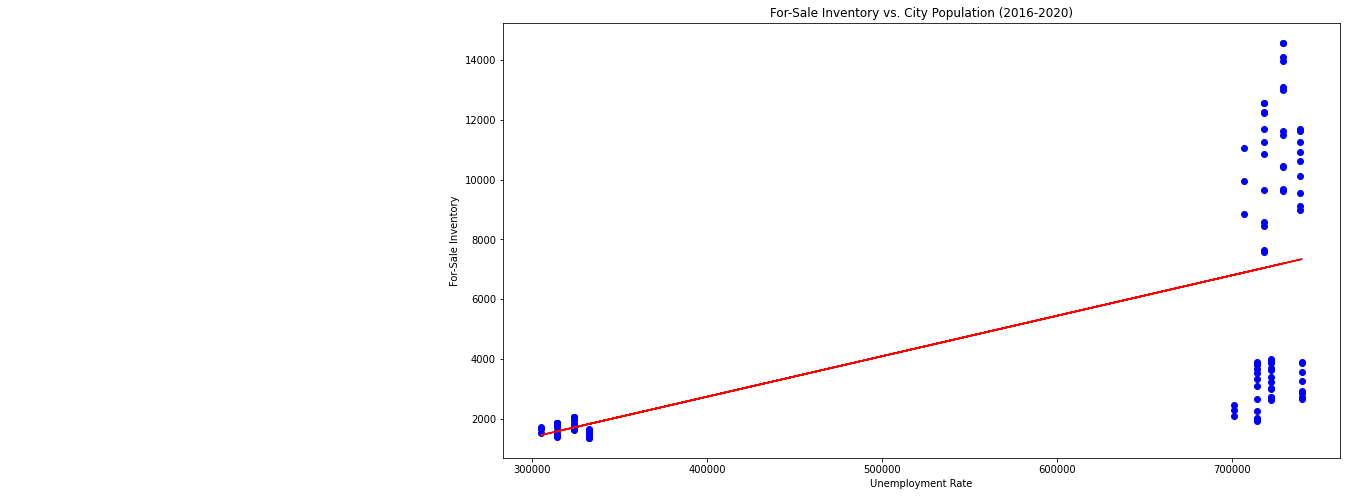

In [55]:
#combined graph for presentation -- Unemployment Rate
x_values = isam_df['County Population']
y_values = isam_df['Value']

plt.xlabel('Unemployment Rate')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory vs. City Population (2016-2020)")

#plt.xticks(rotation = 'vertical')
#plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("master_csv_isam_unemployment.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

In [57]:
#combined graph for presentation -- Unemployment Rate
fmac_df = isam_df.dropna(['Freddie Mac Rate'])
x_values = isam_df['Freddie Mac Rate']
y_values = isam_df['Value']

plt.xlabel('Unemployment Rate')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory vs. City Population (2016-2020)")

#plt.xticks(rotation = 'vertical')
#plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("master_csv_isam_unemployment.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

TypeError: supplying multiple axes to axis is no longer supported.

In [3]:
#sort master into 4 based on region name
denver_df = master_csv.loc[master_csv['Region Name']=='Denver, CO']
greeley_df = master_csv.loc[master_csv['Region Name']=='Greeley, CO']
csprings_df = master_csv.loc[master_csv['Region Name']=='Colorado Springs, CO']
breck_df = master_csv.loc[master_csv['Region Name']=='Breckenridge, CO; CO']

In [4]:
#ISAM & IRSW for Denver
denver_isam = denver_df.loc[denver_df['Indicator ID']=='ISAM']
denver_isam

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
10280,2017,Oct,2017-10,10/31/2017,10/5/2017,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",11047.0,706615,2.9,4.00,3.85
10281,2017,Oct,2017-10,10/31/2017,10/12/2017,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",11047.0,706615,2.9,4.00,3.91
10282,2017,Oct,2017-10,10/31/2017,10/19/2017,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",11047.0,706615,2.9,4.00,3.88
10283,2017,Oct,2017-10,10/31/2017,10/26/2017,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",11047.0,706615,2.9,4.13,3.94
10588,2017,Nov,2017-11,11/30/2017,11/2/2017,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",9969.0,706615,2.9,4.00,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62298,2020,Aug,2020-8,8/31/2020,8/6/2020,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",11276.0,738598,6.7,3.00,2.88
62299,2020,Aug,2020-8,8/31/2020,8/13/2020,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",11276.0,738598,6.7,3.00,2.96
62300,2020,Aug,2020-8,8/31/2020,8/20/2020,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",11276.0,738598,6.7,2.88,2.99
62301,2020,Aug,2020-8,8/31/2020,8/27/2020,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",11276.0,738598,6.7,2.88,2.91


In [5]:
#ISAM for Colorado Springs
csprings_isam = csprings_df.loc[csprings_df['Indicator ID']=='ISAM']
csprings_isam_grouped = csprings_isam.groupby("Year-Month").first()
csprings_isam_grouped


,Year,Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
Year-Month,,,,,,,,,,,,,,
2017-10,2017,Oct,10/31/2017,10/5/2017,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",2445.0,701363,2.9,4.00,3.85
2017-11,2017,Nov,11/30/2017,11/2/2017,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",2275.0,701363,2.9,4.00,3.94
2017-12,2017,Dec,12/31/2017,12/21/2017,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",2089.0,701363,2.9,4.13,3.94
2018-1,2018,Jan,1/31/2018,1/4/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",2037.0,714386,3.0,4.13,3.95
2018-10,2018,Oct,10/31/2018,10/4/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",3866.0,714386,3.3,4.88,4.71
2018-11,2018,Nov,11/30/2018,11/1/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",3661.0,714386,3.3,4.88,4.83
2018-12,2018,Dec,12/31/2018,12/6/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",3328.0,714386,3.2,4.75,4.75
2018-2,2018,Feb,2/28/2018,2/1/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",1914.0,714386,3.0,4.38,4.22
2018-3,2018,Mar,3/31/2018,3/1/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",1974.0,714386,3.0,4.50,4.43


In [6]:
#ISAM & ISRW for Greeley
greeley_isam = greeley_df.loc[greeley_df['Indicator ID']=='ISAM']
greeley_isam_grouped = greeley_isam.groupby("Year-Month").first()
greeley_isam_grouped

,Year,Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
Year-Month,,,,,,,,,,,,,,
2017-10,2017,Oct,10/31/2017,10/5/2017,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",1721.0,305088,2.9,4.00,3.85
2017-11,2017,Nov,11/30/2017,11/2/2017,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",1650.0,305088,2.9,4.00,3.94
2017-12,2017,Dec,12/31/2017,12/21/2017,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",1530.0,305088,2.9,4.13,3.94
2018-1,2018,Jan,1/31/2018,1/4/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",1481.0,314169,3.0,4.13,3.95
2018-10,2018,Oct,10/31/2018,10/4/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",1869.0,314169,3.3,4.88,4.71
2018-11,2018,Nov,11/30/2018,11/1/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",1850.0,314169,3.3,4.88,4.83
2018-12,2018,Dec,12/31/2018,12/6/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",1755.0,314169,3.2,4.75,4.75
2018-2,2018,Feb,2/28/2018,2/1/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",1403.0,314169,3.0,4.38,4.22
2018-3,2018,Mar,3/31/2018,3/1/2018,ISAM,"For-Sale Inventory (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",1431.0,314169,3.0,4.50,4.43


The correlation coefficient is -0.36
The line equation is as follows:  y = -30.04x + 1832.62


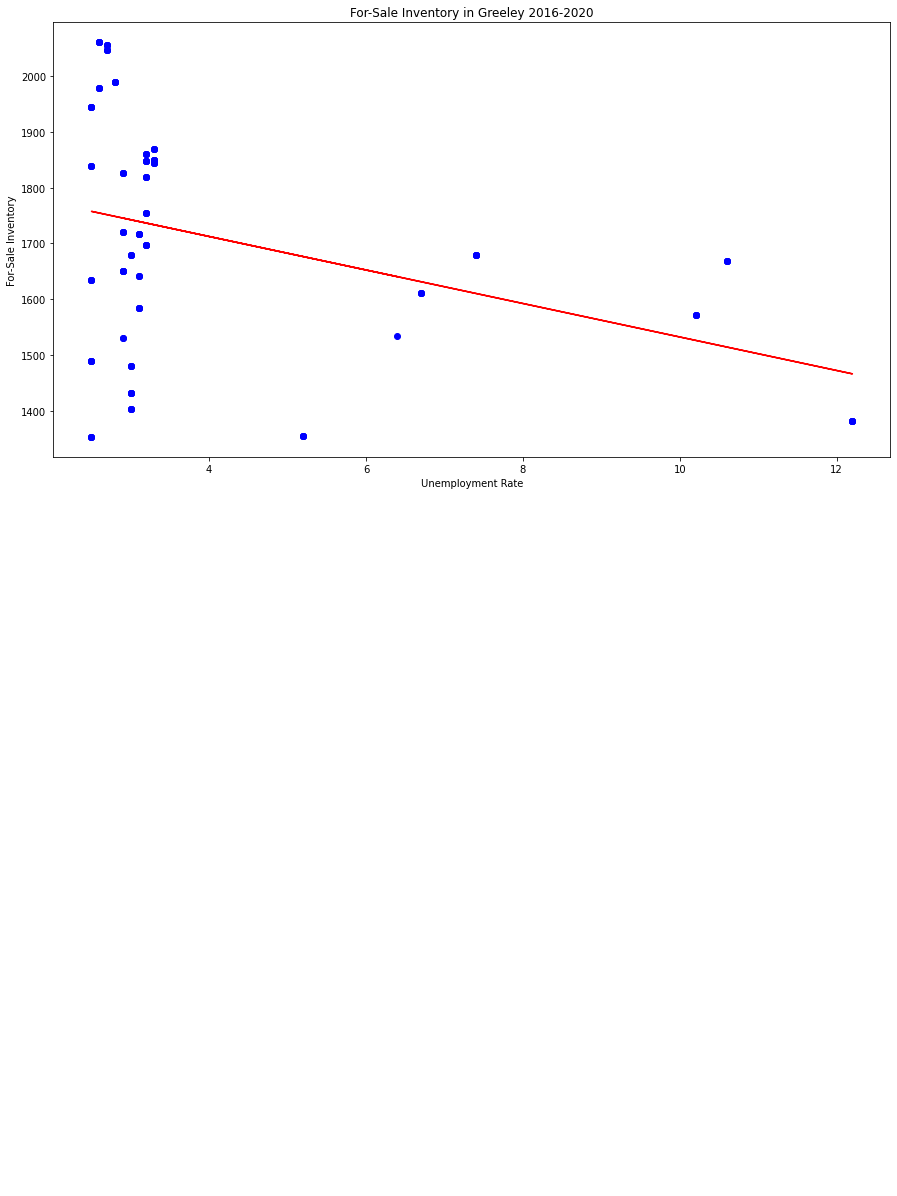

In [47]:
x_values = greeley_isam['Unemployment Rate']
y_values = greeley_isam['Value']

plt.xlabel('Unemployment Rate')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory in Greeley 2016-2020")

#plt.xticks(rotation = 'vertical')
#plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("greeley_isam_unemployment.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

Text(0.5, 1.0, 'Number of listings in Greeley 2016-2020')

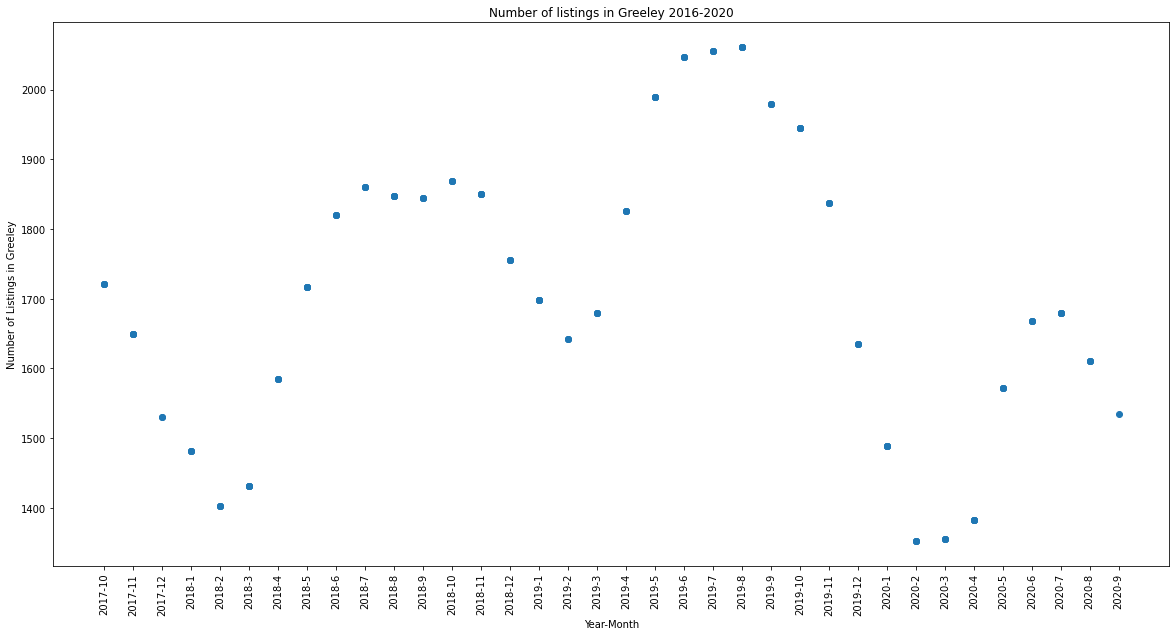

In [32]:
plt.scatter(greeley_isam['Year-Month'], greeley_isam['Value'])
#plt.figure(figsize=(20,20))
plt.xticks(rotation = 'vertical')
plt.rcParams["figure.figsize"] = (15,8)
plt.xlabel('Year-Month')
plt.ylabel('Number of Listings in Greeley')
plt.title("Number of listings in Greeley 2016-2020")

In [ ]:
x_values = north_lat
y_values = north_hem['Wind Speed']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 25),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")


In [4]:
indicators_url = "https://www.quandl.com/api/v3/datatables/ZILLOW/INDICATORS.json?&api_key="
query_url = indicators_url + quandl_key
response = requests.get(query_url).json()
#pprint(json.dumps(response, indent=4, sort_keys=True))

In [5]:
regions_url = "https://www.quandl.com/api/v3/datatables/ZILLOW/regions.json?region_type=city&api_key="
rquery_url = regions_url + quandl_key
r_response = requests.get(rquery_url).json()
#print(json.dumps(r_response, indent=4, sort_keys=True))
region_ids = pd.read_csv('data/zillow_region_ids.csv')
#region_ids
#region_ids[region_ids['Neighborhood'].str.contains('Denver')]
region_ids[region_ids['State_abrv'].str.contains('CO')]


,Region_id,Region_type,City_Name,State_abrv,Neighborhood,County
184,9594,city,Rocky Ford,CO,Otero County,NaN
206,9547,city,Weston,CO,Las Animas County,NaN
298,9328,city,Tabernash,CO,Grand County,NaN
395,9094,city,Pleasant View,CO,Montezuma County,NaN
405,9061,city,Mesa,CO,Grand Junction,Mesa County
...,...,...,...,...,...,...
9793,41283,city,Trinidad,CO,Las Animas County,NaN
9853,41152,city,Swink,CO,Otero County,NaN
9875,41110,city,Sugar City,CO,Crowley County,NaN
9958,4095,city,Chromo,CO,Archuleta County,NaN


In [41]:
co_region_ids = [11093, 16846, 5519, 20793, 34781, 10181, 44515, 38992, 33334, 10574, 23984, 17545, 19055, 17163, 4592,
                 26213, 119842, 50547, 45470, 24634, 119404,
                 12834, 24367, 120381, 7811, 38807, 46297, 17755, 52003, 4548, 119221, 13759, 119157, 55662, 4197,
                 16865, 120317, 37852, 36384, 7507, 44909, 119469, 8471, 39098, 52230, 38324, 120500, 13288, 16394,
                 49882, 120020, 395432, 21854, 17754, 119632, 22800, 119114, 56787, 24366, 24665, 4960, 52196, 120107,
                 8179, 119390, 36867, 16729, 46104, 46323, 24170, 120333, 11824, 50963, 24590, 11751, 31633, 12042,
                 120074, 13856, 45936, 55580, 39666, 54425, 396043, 42203, 23185, 30476, 6510, 396035, 16589, 50328]

In [42]:
#data = quandl.get_table('ZACKS/FC', paginate=True, ticker=['AAPL', 'MSFT'],
#per_end_date={'gte': '2015-01-01'}, qopts={'columns':['ticker', 'per_end_date']})
isaw_data = quandl.get_table("ZILLOW/DATA", api_key=quandl_key,
                             indicator_id='ISAW', paginate=True)#, region_id = co_region_ids)
isaw_data



#np.where(data['region_id']==4592)
#per_end_date={'gte': '2016-04-26'}

,indicator_id,region_id,date,value
None,,,,
0,ISAW,753924,2020-10-03,3541.0
1,ISAW,753924,2020-09-26,3560.0
2,ISAW,753924,2020-09-19,3587.0
3,ISAW,753924,2020-08-29,3774.0
4,ISAW,753924,2020-08-22,3771.0
...,...,...,...,...
17627,ISAW,102001,2017-11-04,1325207.0
17628,ISAW,102001,2017-10-28,1329289.0
17629,ISAW,102001,2017-10-21,1334286.0


In [49]:
data3.loc[data3['region_id']=='753924']

,region_id,region_type,region
None,,,
22766,753924,metro,"Urban Honolulu, HI"


In [47]:
data3

,region_id,region_type,region
None,,,
0,99999,zip,98847; WA; Wenatchee; Chelan County; Peshastin
1,99998,zip,98846; WA; Okanogan County; Pateros
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,99996,zip,98844; WA; Okanogan County; Oroville
4,99995,zip,98843; WA; Wenatchee; Douglas County; Orondo
...,...,...,...
78508,100000,zip,98848; WA; Moses Lake; Grant County; Quincy
78509,10000,city,Bloomington; MD; Garrett County
78510,1000,county,Echols County; GA; Valdosta


In [38]:
z1br= quandl.get_table('Zillow/Data', api_key=quandl_key, indicator_id = 'Z1BR', paginate=True, region_id = co_region_ids)
z1br

,indicator_id,region_id,date,value
None,,,,
0,Z1BR,8471,2020-09-30,723751.0
1,Z1BR,8471,2020-08-31,718174.0
2,Z1BR,8471,2020-07-31,713465.0
3,Z1BR,8471,2020-06-30,722672.0
4,Z1BR,8471,2020-05-31,724446.0
...,...,...,...,...
17001,Z1BR,10181,1996-05-31,83774.0
17002,Z1BR,10181,1996-04-30,83497.0
17003,Z1BR,10181,1996-03-31,83065.0


In [59]:
isaw = quandl.get_table('Zillow/Data', api_key=quandl_key, indicator_id = 'ISAW', paginate=True, region_id = co_metro_ids)
#isaw
isaw["date"]= pd.to_datetime(isaw["date"])
isaw_dated =isaw.loc[isaw["date"] > "2016-04-01"]
#isaw
isaw_dated

,indicator_id,region_id,date,value
None,,,,
0,ISAW,395007,2020-10-03,510.0
1,ISAW,395007,2020-09-26,518.0
2,ISAW,395007,2020-09-19,520.0
3,ISAW,395007,2020-08-29,545.0
4,ISAW,395007,2020-08-22,551.0
...,...,...,...,...
919,ISAW,394405,2017-11-04,1152.0
920,ISAW,394405,2017-10-28,1174.0
921,ISAW,394405,2017-10-21,1186.0


In [84]:
#quandl.bulkdownload("ZILLOW/DATA", quandl_key)
#zillow_data = quandl.export_table('ZILLOW/DATA', api_key=quandl_key)

In [3]:
data2 = quandl.get_table("ZILLOW/INDICATORS", api_key="YOUR KEY HERE")
data2

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z4BR,ZHVI 4-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values


In [54]:
#REGIONS TABLE
data3 = quandl.get_table("ZILLOW/REGIONS", api_key=quandl_key, paginate=True)
data3
#FOUND CO COUNTIES
co_region = data3[data3['region'].str.contains('CO')]
co_county = co_region[co_region['region_type']=='county']
co_county_ids = co_county['region_id'].tolist()
co_metros = co_region[co_region['region_type']=='metro']
co_metro_ids = co_metros['region_id'].tolist()
print(co_metro_ids)
#print(co_county_ids)

['753921', '753881', '753874', '753871', '395130', '395007', '394876', '394645', '394639', '394606', '394602', '394556', '394547', '394530', '394484', '394437', '394405']
